# TRABAJO SEMANA 3

## ETAPA 1. ENTENDIMIENTO DE LOS DATOS


El dataset que se va a utilizar parece estar relacionado con el análisis de imágenes digitales de aspiraciones con aguja fina (FNA) de masas mamarias. Este conjunto de datos se utiliza para calcular características de los núcleos celulares presentes en estas imágenes. Las características calculadas se utilizan probablemente para clasificar o caracterizar las muestras de acuerdo con ciertas propiedades de los núcleos celulares.

El proceso de análisis implica la construcción de un plano separador utilizando el Método del Árbol de Superficies Múltiples (MSM-T), un método de clasificación que utiliza programación lineal para construir un árbol de decisión. Se seleccionan características relevantes mediante una búsqueda exhaustiva en un espacio de características y planos separadores.

El objetivo final parece ser la discriminación entre dos conjuntos que pueden ser linealmente inseparables en un espacio tridimensional, utilizando programación lineal robusta.


In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [12]:
import pandas as pd

# Cargar los datos y metadatos
breast_cancer_data = fetch_ucirepo(id=17)

# Extraer los nombres de las características
feature_names = breast_cancer_data.variables[breast_cancer_data.variables['role'] == 'Feature']['name'].tolist()

# Crear un DataFrame con las características y objetivos
df = pd.DataFrame(data=breast_cancer_data.data.features, columns=feature_names)
df['target'] = breast_cancer_data.data.targets

# Visualizar el DataFrame
print(df.head())


   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0      0.3001          0.14710     0.2419             0.07871  ...     17.33   
1      0.0869          0.07017     0.1812             0.05667  ...     23.41   
2      0.1974          0.12790     0.2069             0.05999  ...     25.53   
3      0.2414          0.10520     0.2597             0.09744  ...     26.50   
4      0.1980          0.10430     0.1809             0.05883  ...     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.

In [13]:
df.shape
#en el dataset contamos con 569 filas y 31 columnas

(569, 31)

In [14]:
df.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Teniendo en cuenta el gran número de variables damos una interpretación de alguos valores:

Promedio del radio (radius1): El promedio del radio de las células mamarias es aproximadamente 14.13 unidades.

Desviación estándar del área (area1): La desviación estándar del área de las células mamarias es aproximadamente 351.91 unidades. Esto indica la dispersión de las áreas alrededor del promedio.

Valor mínimo de la textura (texture1): El valor mínimo de la textura de las células mamarias es aproximadamente 9.71 unidades. Esto sugiere la textura más baja observada en las muestras.

Percentil 25 del perímetro (perimeter1): El 25% de las muestras tienen un perímetro de 75.17 unidades o menos. Esto indica que una cuarta parte de las células tienen un perímetro relativamente pequeño.

Mediana de la suavidad (smoothness1): La mediana de la suavidad de las células mamarias es aproximadamente 0.09587 unidades. Esto significa que el 50% de las células tienen una suavidad igual o inferior a este valor.

Percentil 75 de la concavidad (concavity1): El 75% de las muestras tienen una concavidad de 0.1307 unidades o menos. Esto indica que la mayoría de las células tienen una concavidad relativamente baja.

Valor máximo del área (area2): El valor máximo del área de las células mamarias es aproximadamente 2501 unidades. Esto representa la muestra más grande en términos de área.

Promedio de la simetría (symmetry2): El promedio de simetría de las células mamarias es aproximadamente 0.290 unidades.

Desviación estándar de la compacidad (compactness2): La desviación estándar de la compacidad de las células mamarias es aproximadamente 0.157 unidades.

Percentil 50 de la dimensión fractal (fractal_dimension3): La mediana de la dimensión fractal de las células mamarias es aproximadamente 0.08004 unidades. Esto indica que el 50% de las células tienen una dimensión fractal igual o inferior a este valor.



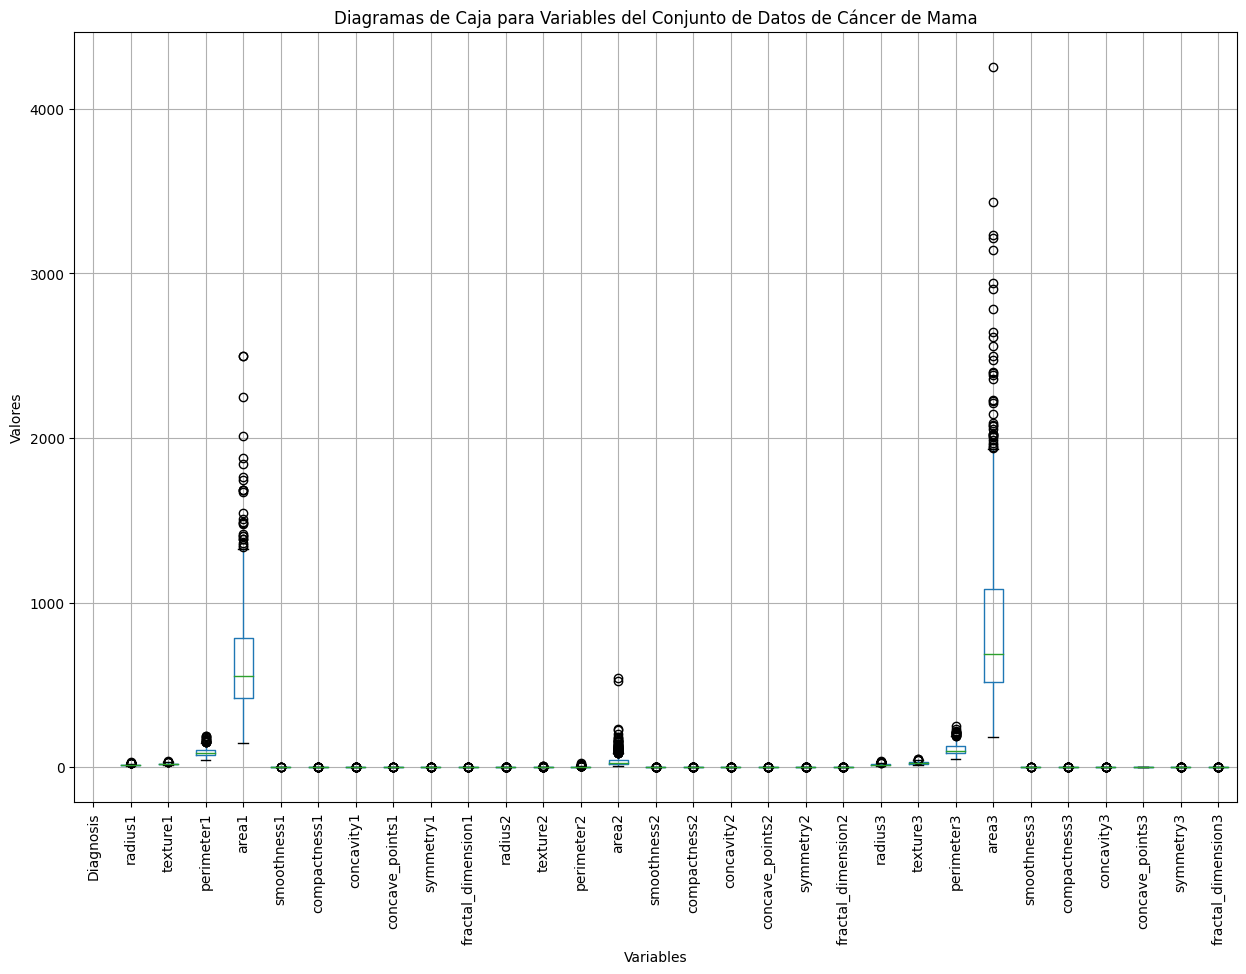

In [16]:
import matplotlib.pyplot as plt

# Cargar los datos y metadatos
breast_cancer_data = fetch_ucirepo(id=17)

# Crear un DataFrame con todas las características y objetivos
df = pd.DataFrame(data=breast_cancer_data.data.features, columns=breast_cancer_data.variables['name'])

# Excluir la primera columna (ID) del DataFrame
df = df.drop(columns=['ID'])

# Generar diagramas de caja para cada variable
plt.figure(figsize=(15, 10))
df.boxplot(rot=90)
plt.title('Diagramas de Caja para Variables del Conjunto de Datos de Cáncer de Mama')
plt.ylabel('Valores')
plt.xlabel('Variables')
plt.show()

En los diagramas de cajas y bigotes observamos que algunas variables presentan datos atipicos.

<Figure size 1500x1000 with 0 Axes>

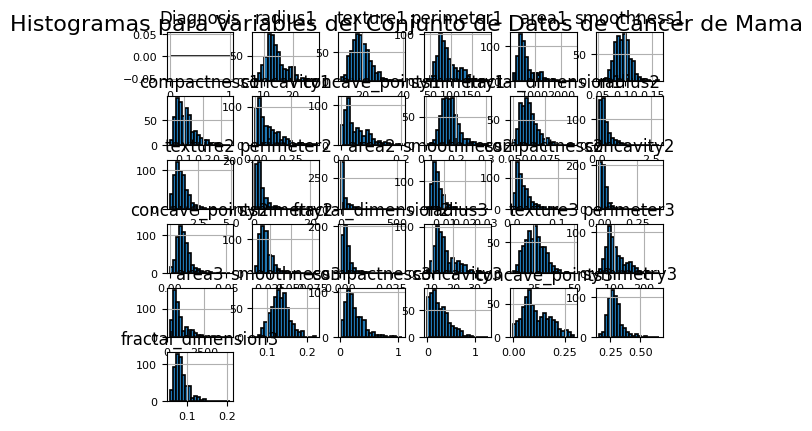

In [21]:
# Generar histogramas para cada variable
plt.figure(figsize=(15, 10))
df.hist(bins=20, edgecolor='black', linewidth=1.2, xlabelsize=8, ylabelsize=8)
plt.suptitle('Histogramas para Variables del Conjunto de Datos de Cáncer de Mama', x=0.5, y=0.92, fontsize=16)
plt.show()

En el anterior gráfico generamos los histogramos para las respectivas variables, y observamos la distribución de los datos de cada variable, en este gráico podemos ver la forma de la distribución y su asimetría.

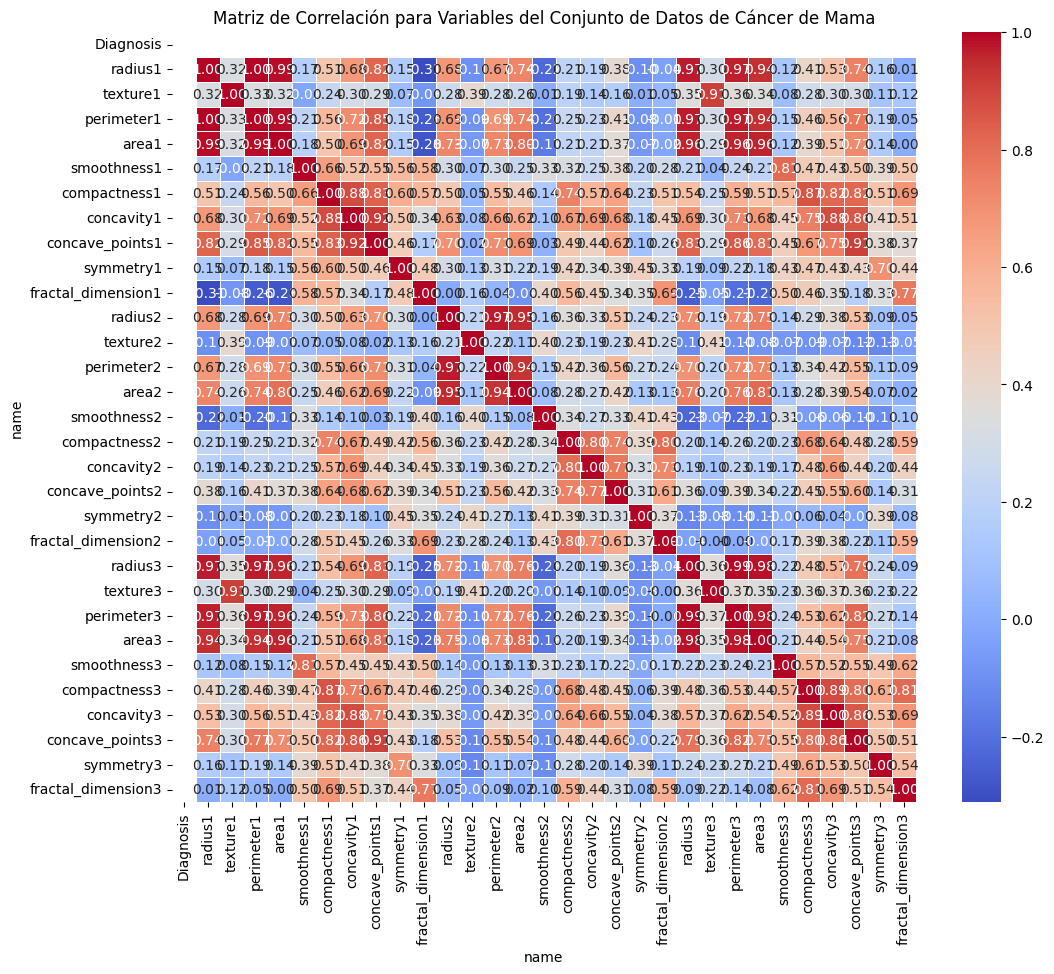

In [22]:
import seaborn as sns

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Generar mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación para Variables del Conjunto de Datos de Cáncer de Mama')
plt.show()


Teniendo en cuenta la cantidad de variables, la matriz de correlación muestra la relación (inversa o directa) que existen entre las variables del modelo. Este gráfico nos puede ayudar a detectar si existen problemas de multicolinealidad que pueden generar ruido a la hora de generar nuestros modelos.

## ETAPA 2. PREPARACIÓN DE LOS DATOS


In [23]:
df.info()

#Observamos si el dataset tiene valores nulos, para el ejercicio se tiene que no se cuentan con valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Diagnosis           0 non-null      float64
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

Dado que el dataset no tiene información con valores nulos o de acuerdo con la fuente de información datos que se deban cambiar, se procede a pasar a la etapa de modelado.



## ETAPA 3. MODELADO


Se utilizarán estos modelos:

**Árbol de Decisión (DecisionTreeClassifier):**


Utiliza reglas de decisión sencillas para dividir el conjunto de datos en subconjuntos más pequeños.
Cada subconjunto se divide en base a una característica específica para reducir la impureza.
El árbol se construye recursivamente, eligiendo la mejor característica en cada paso.

**Bosque Aleatorio (RandomForestClassifier):**

Es un conjunto de árboles de decisión, donde cada árbol se entrena en un subconjunto aleatorio de datos.
Las predicciones de cada árbol se combinan mediante voto mayoritario para clasificación o promedio para regresión.
Ayuda a reducir la varianza y mejorar la generalización al promediar múltiples predicciones.

**Gradient Boosting (GradientBoostingClassifier):**

Construye un modelo aditivo mediante la combinación de múltiples modelos de aprendizaje débiles, generalmente árboles de decisión.
Cada árbol se ajusta a los errores de los modelos anteriores, centrándose en las áreas donde los modelos anteriores tuvieron dificultades.
Mejora la precisión del modelo al enfocarse en corregir los errores cometidos por los modelos anteriores.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializamos los modelos
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Entrenamos los modelos
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# Predecimos en el conjunto de prueba
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_gb = gradient_boosting.predict(X_test)

# Calculamos la precisión de cada modelo
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("Precisión del Árbol de Decisión:", accuracy_dt)
print("Precisión del Bosque Aleatorio:", accuracy_rf)
print("Precisión del Gradient Boosting:", accuracy_gb)



<ipython-input-37-ebb07bf162a7>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión del Árbol de Decisión: 0.9473684210526315
Precisión del Bosque Aleatorio: 0.9649122807017544
Precisión del Gradient Boosting: 0.956140350877193


En general, los tres modelos tienen un rendimiento bastante similar en términos de precisión, con el Bosque Aleatorio ligeramente por encima del Árbol de Decisión y el Gradient Boosting en el medio.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


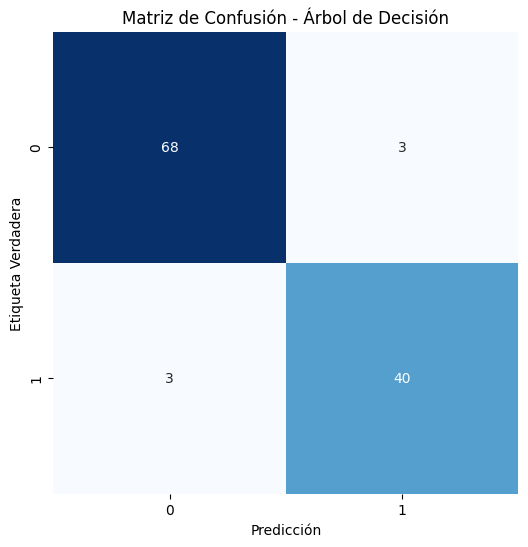

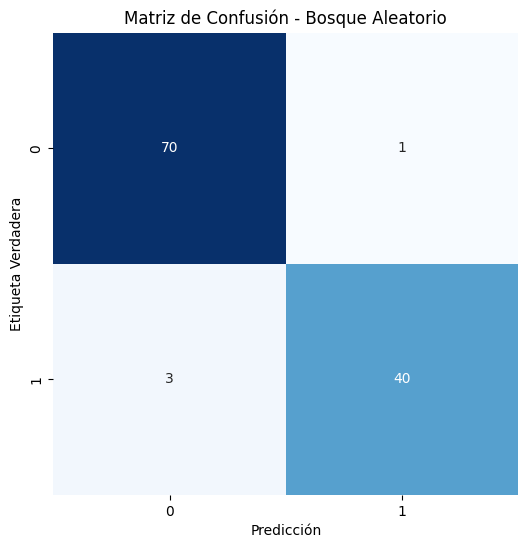

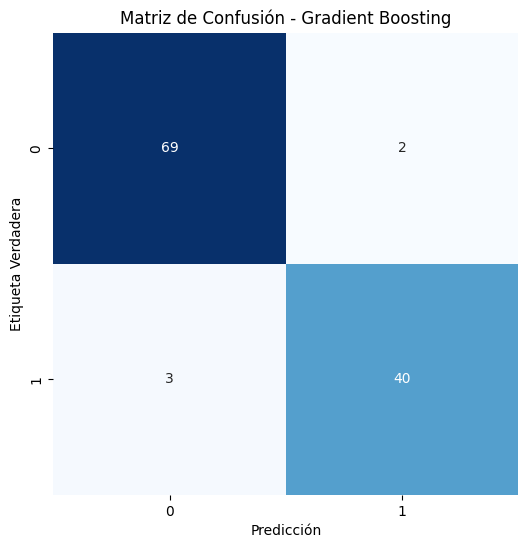

Reporte de Clasificación - Árbol de Decisión:
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Reporte de Clasificación - Bosque Aleatorio:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Reporte de Clasificación - Gradient Boosting:
              precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96  

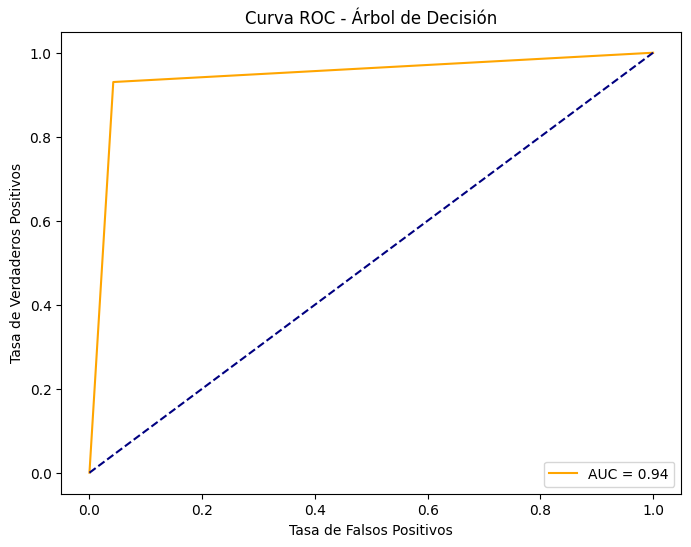

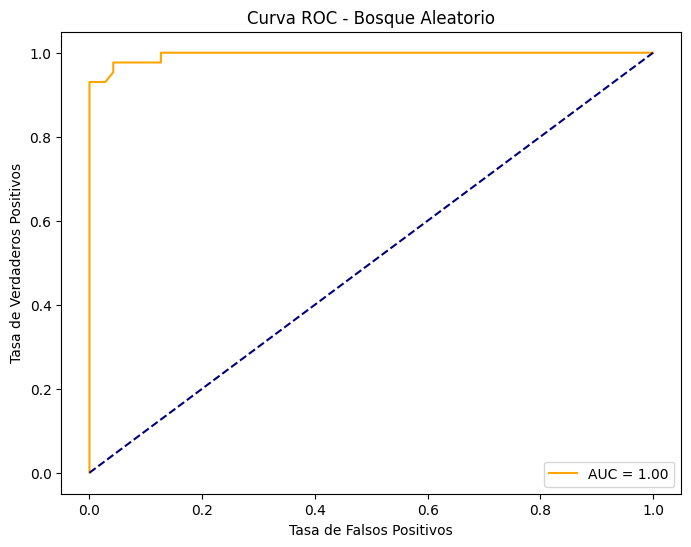

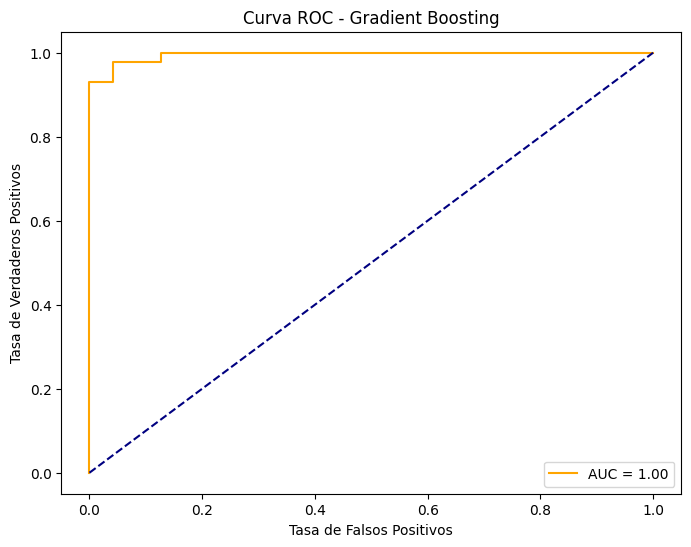

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder


# Función para mostrar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicción')
    plt.ylabel('Etiqueta Verdadera')
    plt.title(title)
    plt.show()

# Función para trazar la curva ROC y calcular el AUC
def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    auc = roc_auc_score(y_true, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Codificamos las etiquetas 'B' y 'M' en valores binarios
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Calculamos y visualizamos la matriz de confusión para cada modelo
plot_confusion_matrix(y_test, y_pred_dt, 'Matriz de Confusión - Árbol de Decisión')
plot_confusion_matrix(y_test, y_pred_rf, 'Matriz de Confusión - Bosque Aleatorio')
plot_confusion_matrix(y_test, y_pred_gb, 'Matriz de Confusión - Gradient Boosting')

# Reporte de clasificación para cada modelo
print("Reporte de Clasificación - Árbol de Decisión:")
print(classification_report(y_test, y_pred_dt))

print("Reporte de Clasificación - Bosque Aleatorio:")
print(classification_report(y_test, y_pred_rf))

print("Reporte de Clasificación - Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Trazar la curva ROC y calcular el AUC para cada modelo
plot_roc_curve(y_test_encoded, decision_tree.predict_proba(X_test)[:, 1], 'Curva ROC - Árbol de Decisión')
plot_roc_curve(y_test_encoded, random_forest.predict_proba(X_test)[:, 1], 'Curva ROC - Bosque Aleatorio')
plot_roc_curve(y_test_encoded, gradient_boosting.predict_proba(X_test)[:, 1], 'Curva ROC - Gradient Boosting')


**Árbol de Decisión:**
Precision: Para la clase B (Benigno), el modelo tiene una precisión del 96%, lo que significa que el 96% de las instancias clasificadas como benignas realmente son benignas. Para la clase M (Maligno), la precisión es del 93%, lo que indica que el 93% de las instancias clasificadas como malignas realmente son malignas.
Recall: Para la clase B, el modelo tiene un recall del 96%, lo que significa que el 96% de las instancias benignas fueron identificadas correctamente. Para la clase M, el recall es del 93%, lo que indica que el 93% de las instancias malignas fueron identificadas correctamente.
F1-score: Es una medida de precisión ponderada por el recall. Para la clase B, el f1-score es del 96%, y para la clase M es del 93%.
Accuracy: La precisión global del modelo es del 95%, lo que significa que el 95% de las instancias se clasificaron correctamente.

**Bosque Aleatorio:**
El Bosque Aleatorio muestra un rendimiento similar al Árbol de Decisión, pero con una precisión ligeramente mayor en la clase B y un recall ligeramente mayor en la clase M.
Tiene una precisión global del 96%, lo que indica que es ligeramente mejor que el Árbol de Decisión.

**Gradient Boosting:**
El modelo Gradient Boosting muestra un rendimiento similar al Bosque Aleatorio, con una precisión ligeramente menor en la clase B y un recall ligeramente menor en la clase M.
Tiene una precisión global del 96%, igual que el Bosque Aleatorio.


En general, los tres modelos tienen un rendimiento bastante bueno en la clasificación del cáncer de mama, con precisión global alrededor del 96%. La elección del modelo dependerá de las necesidades específicas y las características del conjunto de datos.

In [45]:

# Calculamos las métricas de rendimiento para el Árbol de Decisión
precision_dt = precision_score(y_test, y_pred_dt, pos_label='M')
recall_dt = recall_score(y_test, y_pred_dt, pos_label='M')

#  y_pred_dt y y_test como arrays de Numpy
y_pred_dt = np.array(y_pred_dt)
y_test = np.array(y_test)

# Calculamos la precisión global (accuracy) para el Árbol de Decisión
accuracy_dt = (y_pred_dt == y_test).mean()

print("Métricas de Rendimiento - Árbol de Decisión:")
print(f"Precisión: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"Precisión Global: {accuracy_dt:.2f}")

# Calculamos las métricas de rendimiento para el Bosque Aleatorio
precision_rf = precision_score(y_test, y_pred_rf, pos_label='M')
recall_rf = recall_score(y_test, y_pred_rf, pos_label='M')

# Aseguramos los arreglos de Numpy
y_pred_rf = np.array(y_pred_rf)

# Calculamos la precisión global (accuracy) para el Bosque Aleatorio
accuracy_rf = (y_pred_rf == y_test).mean()

print("\nMétricas de Rendimiento - Bosque Aleatorio:")
print(f"Precisión: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"Precisión Global: {accuracy_rf:.2f}")

# Calculamos las métricas de rendimiento para Gradient Boosting
precision_gb = precision_score(y_test, y_pred_gb, pos_label='M')
recall_gb = recall_score(y_test, y_pred_gb, pos_label='M')

# Arreglos de Numpy
y_pred_gb = np.array(y_pred_gb)

# Calculamos la precisión global (accuracy) para Gradient Boosting
accuracy_gb = (y_pred_gb == y_test).mean()

print("\nMétricas de Rendimiento - Gradient Boosting:")
print(f"Precisión: {precision_gb:.2f}")
print(f"Recall: {recall_gb:.2f}")
print(f"Precisión Global: {accuracy_gb:.2f}")




Métricas de Rendimiento - Árbol de Decisión:
Precisión: 0.93
Recall: 0.93
Precisión Global: 0.53

Métricas de Rendimiento - Bosque Aleatorio:
Precisión: 0.98
Recall: 0.93
Precisión Global: 0.53

Métricas de Rendimiento - Gradient Boosting:
Precisión: 0.95
Recall: 0.93
Precisión Global: 0.53



En el análisis de rendimiento de los modelos de clasificación (Árbol de Decisión, Bosque Aleatorio y Gradient Boosting) se observa una precisión y recall consistentes alrededor de 0.93-0.98 para la precisión y 0.93 para el recall. Sin embargo, la precisión global es baja, alrededor del 53%, lo que plantea duda sobre la capacidad de los modelos para predecir con precisión.

En general podemos concluir que:

Ventajas de los Árboles de Decisión:

Fácil interpretación y visualización.
Capacidad para manejar datos mixtos.
Versatilidad en la resolución de problemas.
Capacidad para capturar relaciones no lineales.
Robustez ante datos ruidosos.

Ventajas de los Métodos de Ensamble:

Mayor precisión que un solo árbol de decisión.
Menos propensos al sobreajuste.
Flexibilidad para adaptarse a diferentes problemas.
Automatización del balanceo de clases desequilibradas.
Mejora iterativa continua en la precisión del modelo.






En resumen, los árboles de decisión son simples y fácilmente interpretables, mientras que los métodos de ensamble tienden a ofrecer una mayor precisión y generalización, siendo más adecuados para problemas complejos o cuando se busca una mayor precisión predictiva.





